This project aims to analyse employee exit surveys from the department of education, training and employment, as well a the Techncal and Further Education institute in Australia. I will aim to answer the following questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction?

What about older employees?

In [73]:
import pandas as pd
import numpy as np

In [74]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [75]:
dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


From looking at the first few rows, we can see that there are some null values.

In [76]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

This tells us that only one column has numeric data (ID). Although the columns such as "Cease Date" and "Role Start Date" contain numbers, they have been saved as strings.

Torres Strait has the most null values, with only 3 non null values.

There are 822 rows and 56 columns.

In [77]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The top 5 columns with the most null values are:

Aboriginal                             806
Torres Strait                          819
South Sea                              815
Disability                             799
NESB                                   790


In [78]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Similar to the dete_survey, we can see that this survey has some null values. We cal also see "-" being used as an alternative to NaN too, which will probably not be counted when doing a null count.

In [79]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

We can immediately see that the title of the columns are too long and are hard to read. Unlike the dete_survey, the "cessation year" is stored as a floating number. The record ID is also stored as a number. However things like "Current Age" has not been stored as a number.

There are 72 columns and 702 rows.

In [80]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

tafe_survey does not have as many null values per column as dete_survey does. The columns with the highest number of null values is "Main Factor. Which of these was the main factor for leaving?" with 589 null values.  

The second highest value of null values in a column is 265, to which there are 12 columns.

Again, these null values do not include "-"



In both surveys there are columns with different names but similar meanings. For example in dete_survey there is "Job dissatisfaction" and           
"Dissatisfaction with the department". Both aso contain columns we dont need.

In [81]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [82]:
dete_survey_updated = dete_survey.drop(labels=dete_survey.columns[28:49],axis=1)

In [83]:
print(dete_survey_updated)

      ID                        SeparationType Cease Date  DETE Start Date  \
0      1                 Ill Health Retirement    08/2012           1984.0   
1      2      Voluntary Early Retirement (VER)    08/2012              NaN   
2      3      Voluntary Early Retirement (VER)    05/2012           2011.0   
3      4             Resignation-Other reasons    05/2012           2005.0   
4      5                        Age Retirement    05/2012           1970.0   
5      6             Resignation-Other reasons    05/2012           1994.0   
6      7                        Age Retirement    05/2012           1972.0   
7      8                        Age Retirement    05/2012           1988.0   
8      9             Resignation-Other reasons    07/2012           2009.0   
9     10            Resignation-Other employer       2012           1997.0   
10    11                        Age Retirement       2012           1999.0   
11    12  Resignation-Move overseas/interstate       2012       

In [84]:
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66],axis=1)

The following columns were dropped as the data it held would not have helped us answer our initial questions. As a reminder, here they are:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?

What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction?

What about older employees?

In [85]:
print(dete_survey_updated.head())

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [86]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ", "_").str.strip().str.lower()

In [87]:
tafe_survey_updated.rename(columns={'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status',  'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace=True)

In [88]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [89]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


I changed all columns titles to fit the same format, as this allows for consistency (and therefore no duplicate columns) when I aggregrate the data.

In [90]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [91]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [92]:
tafe_survey_updated.copy()[tafe_survey_updated["separationtype"] == "Resignation"]

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [93]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated["separationtype"] == "Resignation"]

In [94]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [95]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 10000;

<IPython.core.display.Javascript object>

In [96]:
a =(dete_survey_updated["separationtype"] == "Resignation-Other reasons")

In [97]:
b = (dete_survey_updated["separationtype"] == "Resignation-Other employer")

In [98]:
 c = (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")

In [99]:
dete_resignations = dete_survey_updated.copy()[a | b | c]

In [100]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null object
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_enviro

I cut down the data to only include those who had resigned from their job. This is because the main questions I am trying to answer are 

"Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?" which means that other reasons for leaving are not relevant.

In [101]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [102]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [103]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [104]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [105]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [106]:
dete_resignations['cease_date'].sort_index(ascending=True)

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
        ...  
747    2014.0
751    2013.0
752    2013.0
753    2013.0
755    2013.0
762    2006.0
766    2014.0
769    2013.0
770       NaN
771    2014.0
774       NaN
784    2013.0
786    2014.0
788       NaN
789    2014.0
790    2014.0
791       NaN
794    2013.0
797       NaN
798       NaN
802    2013.0
803    2014.0
804    2014.0
806    2013.0
807    2013.0
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

In [107]:
tafe_resignations['cease_date'].sort_index(ascending=True)

3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
8      2009.0
9      2010.0
10     2010.0
13     2010.0
14     2010.0
15     2010.0
16     2010.0
17     2010.0
18     2010.0
19     2010.0
20     2010.0
21     2010.0
22     2010.0
23     2010.0
24     2010.0
26     2010.0
27     2010.0
29     2010.0
32     2010.0
36     2010.0
37     2010.0
39     2010.0
40     2010.0
41     2010.0
42     2010.0
        ...  
659    2013.0
660    2013.0
661    2013.0
665    2013.0
666    2013.0
669    2013.0
670    2013.0
671    2013.0
675    2013.0
676    2013.0
677    2013.0
678    2013.0
679    2013.0
681    2013.0
682    2013.0
683    2013.0
684    2013.0
685    2013.0
686    2013.0
688    2013.0
689    2013.0
690    2013.0
691    2013.0
693    2013.0
694    2013.0
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64

In [108]:
dete_resignations['dete_start_date'].sort_index(ascending=True)

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
12     1998.0
14     2007.0
16        NaN
20     1982.0
21     1980.0
22     1997.0
23     1973.0
25     1995.0
27     2005.0
33     2003.0
34     2006.0
37     2011.0
39        NaN
40     1977.0
41     1974.0
42     2011.0
43     1976.0
48     2009.0
50     2009.0
51     1993.0
55     2008.0
57     2003.0
61     2011.0
69     2006.0
71     2011.0
        ...  
747    2008.0
751    2005.0
752    1998.0
753    2004.0
755    2012.0
762    2006.0
766    2007.0
769    2008.0
770    1987.0
771    2002.0
774    2005.0
784    2013.0
786    1994.0
788    1990.0
789    1983.0
790    2008.0
791    2007.0
794       NaN
797    2000.0
798    1995.0
802       NaN
803    2004.0
804    2008.0
806    2005.0
807    2004.0
808    2010.0
815    2012.0
816    2012.0
819    2009.0
821       NaN
Name: dete_start_date, Length: 311, dtype: float64

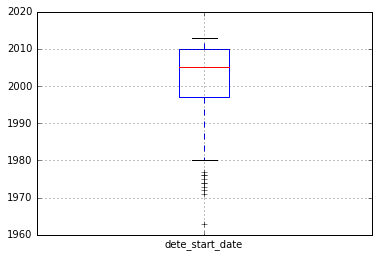

In [109]:
dete_resignations.boxplot(column="dete_start_date")

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,20))


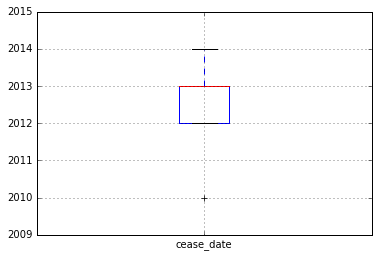

In [111]:
dete_resignations.boxplot(column="cease_date").set_ylim(2009, 2015)
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()


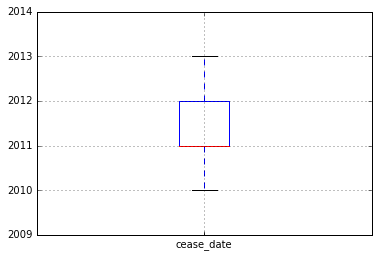

In [112]:
tafe_resignations.boxplot(column="cease_date").set_ylim(2009, 2014)
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()

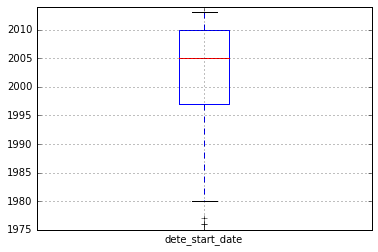

In [113]:
dete_resignations.boxplot(column="dete_start_date").set_ylim(1975, 2014)
plt.ticklabel_format(useOffset=False, axis='y')
plt.show()

The average "cease_date" was lower for tafe than dete by 2 years. Their first and third quartiles are quite similar, being only 1 year apart. Again, dete was larger on both accounts.

In [114]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [115]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0


I created a new column for dete_resignation, so that I could directly compare the length of time employees spent at both the dete and tafe. This column was already created for tafe.

In [116]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [117]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [118]:
def update_vals(data):
    if pd.isnull(data):
        return np.nan
    elif data == "-":
        return False
    else:
        return True
    
    

In [119]:
a = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

In [120]:
mid = a.applymap(update_vals)

In [121]:
mid

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [122]:
tafe_resignations["dissatisfied"] = mid.any(axis=1, skipna=False)

In [123]:
tafe_resignations["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [124]:
tafe_resignations_up = tafe_resignations.copy()

In [125]:
b = dete_resignations[["job_dissatisfaction", 
                       "dissatisfaction_with_the_department", 
                       "physical_work_environment", 
                       "lack_of_recognition", 
                       "lack_of_job_security", 
                       "work_location", 
                       "employment_conditions", 
                       "work_life_balance", "workload"]]

In [126]:
dete_resignations["dissatisfied"] = b.any(axis=1, skipna=False)
dete_resignations["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [127]:
dete_resignations_up = dete_resignations.copy()

In [128]:
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,False
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True
20,21,Resignation-Other employer,2012.0,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,True,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,False
21,22,Resignation-Other reasons,2012.0,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,False


In this section we identified if employees are leaving due to job dissatisfaction. This was a necessary step as the question we are trying to answer

"Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"

insinuates that job dissatisfaction may be a core reason behind resignations.

In [129]:
dete_resignations_up["institute"] = "DETE"

In [130]:
tafe_resignations_up["institute"] = "DETE"

In [131]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up ], ignore_index=True) 

In [132]:
combined.columns

Index(['Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Maternity/Family', 'Contributing Factors. NONE',
       'Contributing Factors. Other', 'Contributing Factors. Study',
       'Contributing Factors. Travel', 'Institute', 'WorkArea', 'aboriginal',
       'age', 'business_unit', 'career_move_to_private_sector',
       'career_move_to_public_sector', 'cease_date', 'classification',
       'dete_start_date', 'disability', 'dissatisfaction_with_the_department',
       'dissatisfied', 'employment_conditions', 'employment_status', 'gender',
       'id', 'ill_health', 'institute', 'institute_service',
       'interpersonal_conflicts', 'jo

In [133]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [134]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [135]:
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

We have now combined the two data sets together. This lets us perform the data analysis we want. We also removed columns with less than 500 non null values. This keeps only data that was found in both data sets, therefore increasing the performance of the program.

In [136]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("str").str.extract(r"(\d+)")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [137]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype("float") 

In [138]:
combined_updated["institute_service"].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [153]:
def category(val):
    if pd.isnull(val):
        return np.nan
    elif val >= 1 and val <= 2:
        return "New"
    elif val >= 3 and val <= 6:
        return "Experienced"
    elif val >= 7 and val <= 10:
        return "Established"
    else:
        return "Veteran"

In [154]:
combined_updated["institute_service"].apply(category)

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
5          Veteran
6      Experienced
7              NaN
8          Veteran
9          Veteran
10         Veteran
11         Veteran
12         Veteran
13     Established
14     Established
15     Experienced
16             New
17             NaN
18         Veteran
19         Veteran
20             New
21         Veteran
22     Experienced
23     Experienced
24         Veteran
25     Experienced
26     Established
27             New
28     Experienced
29             New
          ...     
621            New
622    Experienced
623    Experienced
624            NaN
625            NaN
626    Experienced
627            NaN
628            New
629            New
630            New
631            New
632    Experienced
633            New
634            New
635            New
636            New
637    Experienced
638            New
639    Experienced
640    Experienced
641            New
642         

In [155]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(category)

I have now categorised the level of experiece each employee had. This is important because our question wanted  to know if their years of service affected/ was correlated with their reason for leaving

In [156]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [161]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value=True)

In [162]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

In [164]:
final = pd.pivot_table(combined_updated, values="dissatisfied", index="service_cat")

In [166]:
final

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.265896
Veteran,0.493590


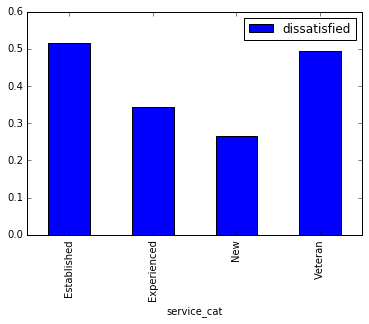

In [165]:
final.plot(kind="bar")

From the data we can see that the more senior the category becomes, the higher the proportion of "dissatisfied" resignations. The proportion of "dissatisfied" resignations is slightly higher in experienced individuals than veterans